In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1. Make a dataframe 'df' out of covid_19_india.csv dataset

In [8]:
df = pd.read_csv('covid_19_india.csv')

In [9]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Unnamed: 9
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0,NaN
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,NaN
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
4597,4598.0,28/07/20,8:00 AM,Tripura,-,-,2467.0,17.0,4049.0,NaN
4598,4599.0,28/07/20,8:00 AM,Uttarakhand,-,-,3675.0,66.0,6328.0,NaN
4599,4600.0,28/07/20,8:00 AM,Uttar Pradesh,-,-,42833.0,1456.0,70493.0,NaN
4600,4601.0,28/07/20,8:00 AM,West Bengal,-,-,39917.0,1411.0,60830.0,NaN


In [10]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed', 'Unnamed: 9'],
      dtype='object')

## Q2. Drop the irrelevant columns like 'Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational', and 'Unnamed: 9'.

In [11]:
df.drop(['Sno','Time','ConfirmedIndianNational', 'ConfirmedForeignNational', 'Unnamed: 9'], axis =1, inplace = True)

In [12]:
df.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

In [13]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0.0,0.0,1.0
1,31/01/20,Kerala,0.0,0.0,1.0
2,01/02/20,Kerala,0.0,0.0,2.0
3,02/02/20,Kerala,0.0,0.0,3.0
4,03/02/20,Kerala,0.0,0.0,3.0
...,...,...,...,...,...
4597,28/07/20,Tripura,2467.0,17.0,4049.0
4598,28/07/20,Uttarakhand,3675.0,66.0,6328.0
4599,28/07/20,Uttar Pradesh,42833.0,1456.0,70493.0
4600,28/07/20,West Bengal,39917.0,1411.0,60830.0


## Q3. Find the active patient and add a columns 'Active' to the dataframe.
Active = (Confirmed-(Deaths+Cured)).

In [14]:
df.loc[:,'Active'] = df['Confirmed'] - (df['Cured']+df['Deaths'])

In [15]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,30/01/20,Kerala,0.0,0.0,1.0,1.0
1,31/01/20,Kerala,0.0,0.0,1.0,1.0
2,01/02/20,Kerala,0.0,0.0,2.0,2.0
3,02/02/20,Kerala,0.0,0.0,3.0,3.0
4,03/02/20,Kerala,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...
4597,28/07/20,Tripura,2467.0,17.0,4049.0,1565.0
4598,28/07/20,Uttarakhand,3675.0,66.0,6328.0,2587.0
4599,28/07/20,Uttar Pradesh,42833.0,1456.0,70493.0,26204.0
4600,28/07/20,West Bengal,39917.0,1411.0,60830.0,19502.0


In [16]:
df.shape

(4602, 6)

In [17]:
df1 = df[df['Date']=='28/07/20']

In [19]:
df1.shape

(35, 6)

## Q4. Find the state having current maximum Active patient and noof active patients

In [10]:
df1[df1['Active'].max()==df1['Active']]['State/UnionTerritory']

4585    Maharashtra
Name: State/UnionTerritory, dtype: object

In [22]:
df1['Active'].max()

147896.0

In [24]:
df1[df1['Active']==147896.0]['State/UnionTerritory']

4585    Maharashtra
Name: State/UnionTerritory, dtype: object

## Q5. Find the state having current minimum Active patient and noof active patients

In [ ]:
df1[df1['Active'].min()==df1['Active']]['State/UnionTerritory']

In [25]:
df1['Active'].min()

145.0

In [26]:
df1[df1['Active']==145.0]['State/UnionTerritory']

4566    Andaman and Nicobar Islands
Name: State/UnionTerritory, dtype: object

## Q6. Find the current Deaths to Cured ratio in all the states then find the states having minimum and maximum ratios

In [27]:
x = df1['Deaths']/(df1['Deaths']+df1['Cured'])

In [28]:
x

4566    0.005181
4567    0.021521
4568    0.005199
4569    0.003374
4570    0.009106
4571    0.023769
4572    0.008436
4573    0.003534
4574    0.032048
4575    0.010447
4576    0.053696
4577    0.015604
4578    0.011382
4579    0.029936
4580    0.023063
4581    0.049271
4582    0.006233
4583    0.003738
4584    0.039785
4585    0.058869
4586    0.000000
4587    0.026178
4588    0.000000
4589    0.008711
4590    0.008390
4591    0.024390
4592    0.033895
4593    0.023585
4594    0.005714
4595    0.021535
4596    0.011063
4597    0.006844
4598    0.017642
4599    0.032875
4600    0.034142
dtype: float64

In [31]:
x.shape

(35,)

In [34]:
x.max()

0.05886942546866983

In [32]:
df1[x == x.max()]['State/UnionTerritory']

4585    Maharashtra
Name: State/UnionTerritory, dtype: object

In [33]:
x.min()

0.0

In [35]:
df1[x == x.min()]['State/UnionTerritory']

4586    Manipur
4588    Mizoram
Name: State/UnionTerritory, dtype: object

## Q7. Take any two states namely Delhi and Maharashtra. Plot 'Cured', 'Deaths' and 'Active' parameters over the Date(as independent value) and infer meaning from the curves. Give a comparision of both the plots

In [36]:
mh = df[df['State/UnionTerritory']=='Maharashtra']
dh = df[df['State/UnionTerritory']=='Delhi']

In [37]:
mh.shape, dh.shape

((142, 6), (149, 6))

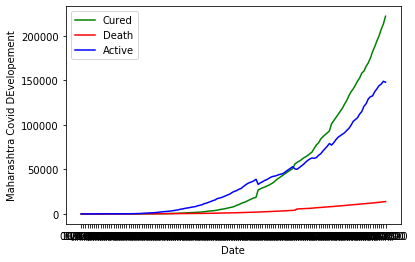

In [38]:
plt.plot(mh['Date'],mh['Cured'] , 'g', label = 'Cured')
plt.plot(mh['Date'],mh['Deaths'], 'r', label = 'Death')
plt.plot(mh['Date'],mh['Active'], 'b', label = 'Active')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Maharashtra Covid DEvelopement')
plt.show()

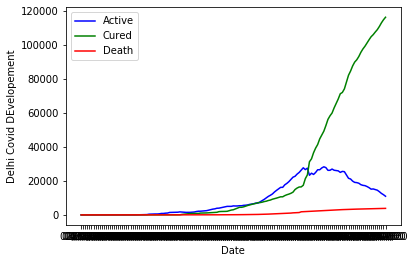

In [39]:
plt.plot(dh['Date'],dh['Active'], 'b', label = 'Active')
plt.plot(dh['Date'],dh['Cured'] , 'g', label = 'Cured')
plt.plot(dh['Date'],dh['Deaths'], 'r', label = 'Death')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Delhi Covid DEvelopement')
plt.show()

## Q8.  Plot pie charts on the last recorded data of both Delhi and Maharashtra having labels as  'Active', 'Deaths', 'Cured' with clear mention of percentage. Infer the meaning out of plot

In [40]:
mh.iloc[-1].name

4585

/home/aadya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


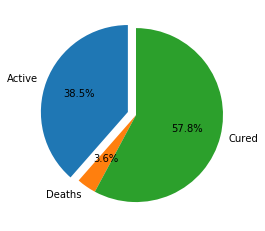

In [41]:
labels = 'Active', 'Deaths', 'Cured'
sizes = mh.loc[[4585],['Active','Deaths','Cured']]
explode = (.1, 0, 0) #.1 of radius

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

plt.show()

In [42]:
dh.iloc[-1].name

4574

/home/aadya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


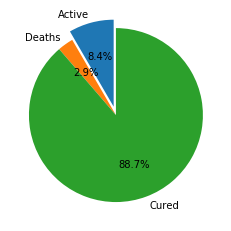

In [43]:
labels = 'Active', 'Deaths', 'Cured'
sizes = dh.loc[[4574],['Active','Deaths','Cured']]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

plt.show()